In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

Importing the Data

In [2]:
df=pd.read_csv('CarsData.csv')
df.sample(10)

,Brand,Type,Manufacture_year,Mileage,Price,Body_type,Fuel,Horse_Power,Gear_box,Transmission,Color,Governorate,Address
902,KIA,Sportage,09-2013,160 000 km,54 000 DT,SUV/4x4,Essence,11 ...,Automatique,Traction,Blanc,Tunis,ADRESSE :Route Nationale 9 (Route de la Marsa)...
1676,Hyundai,i20 Hight grade,12-2022,24 000 km,63 000 DT,Citadine,Essence,5 ...,Manuelle,Traction,Bleu,Sousse,ADRESSE :Hergla sousse
728,Mercedes-Benz,GLA kit AMG,01-2019,43 000 km,155 000 DT,Monospace,Essence,8 ...,Automatique,Traction,Blanc,Sfax,ADRESSE :route de teniour
1228,Toyota,Yaris,03-2020,68 000 km,33 500 DT,Citadine,Essence,4 ...,Manuelle,Traction,Marron,Tunis,ADRESSE :24 Rue Ksour SSEF Manouba
2101,Mercedes-Benz,Classe A,03-2013,160 000 km,63 000 DT,Compacte,Essence,6 ...,Automatique,Traction,Noir,Ben Arous,ADRESSE :Ezzahra
3021,Mazda,CX-5,06-2015,140 000 km,65 000 DT,SUV/4x4,Essence,9 ...,Automatique,Intégrale,Noir,Ben Arous,ADRESSE :megrine
838,Audi,A4 Cabriolet,10-2007,63 000 km,62 500 DT,Cabriolet,Essence,10 ...,Automatique,Propulsion,Gris Shark,Ariana,ADRESSE :El Manzah6
2445,Volkswagen,Polo Sedan trendline,12-2020,36 000 km,59 000 DT,Berline,Essence,5 ...,Manuelle,Traction,Noir,Tunis,ADRESSE :Sidi daoud route gp9 direction la mar...
2270,Citroën,Jumper,08-2011,400 000 km,16 000 DT,Autres,Essence,11 ...,Manuelle,Traction,Blanc,Ariana,ADRESSE :Tunis
859,Volkswagen,Transporter Fourgon 6.1 Haute gamme,04-2016,226 000 km,55 000 DT,Utilitaire,Diesel,7 ...,Manuelle,Traction,Bleu,Sousse,ADRESSE :Sidi bou ali sousse


Cleaning and setting up the Data

In [3]:
df['Price']=df['Price'].str.replace('DT','')
df['Price']=df['Price'].str.replace(' ','')
df=df.rename(columns={'Price':'Price(DT)'})

In [4]:
df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage']=df['Mileage'].str.replace(' ','')
df=df.rename(columns={'Mileage':'Mileage(Km)'})

In [5]:
df['Address']=df['Address'].str.replace('ADRESSE :','')

In [6]:
df['Horse_Power']=df['Horse_Power'].str.replace('cv','CV')

In [7]:
df['Manufacture_year']=pd.to_datetime (df['Manufacture_year'] , format='%m-%Y')

In [8]:
df['Mileage(Km)'] = df['Mileage(Km)'].astype(int)
df['Price(DT)'] = df['Price(DT)'].astype(int)


In [9]:
df.dtypes

Brand                       object
Type                        object
Manufacture_year    datetime64[ns]
Mileage(Km)                  int32
Price(DT)                    int32
Body_type                   object
Fuel                        object
Horse_Power                 object
Gear_box                    object
Transmission                object
Color                       object
Governorate                 object
Address                     object
dtype: object

In [10]:
df

,Brand,Type,Manufacture_year,Mileage(Km),Price(DT),Body_type,Fuel,Horse_Power,Gear_box,Transmission,Color,Governorate,Address
0,Volkswagen,Golf 7,2012-12-01,264500,42000,Compacte,Essence,5 ...,Manuelle,Traction,Blanc,Tunis,AIN ZAGHOUANE
1,Mercedes-Benz,Classe A,2021-01-01,50000,165000,Utilitaire,Hybride (essence/électrique),6 ...,Automatique,Traction,Noir,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
2,Land,Rover Range Rover Sport HSE TU 239,2014-05-01,90000,238000,SUV/4x4,Essence,24 ...,Automatique,Traction,Vert,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
3,Mercedes-Benz,Classe S KIT AMG jantes 20’’,2010-04-01,165000,125500,Berline,Essence,18 ...,Automatique,Traction,Noir,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
4,BMW,Série 5 LUXYRY LINE,2018-04-01,46000,183000,Berline,Essence,10 ...,Automatique,Traction,Blanc,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,KIA,Sportage SX 2022,2022-09-01,14000,162500,Monospace,Essence,10 ...,Automatique,Traction,Noir,La Manouba,Manouba residence yassine cité les orangers
3500,Toyota,Aygo,2019-08-01,75000,30000,Compacte,Essence,4 ...,Manuelle,Traction,Rouge,Monastir,Skanes Monastir
3501,MG,ZS,2019-11-01,75000,70000,Autres,Essence,7 ...,Automatique,Intégrale,Noir,Tunis,LAC 1
3502,Fiat,500 2009,2009-08-01,175000,23000,Citadine,Essence,4 ...,Manuelle,Traction,Noir,Ben Arous,Rades


Brand
Mercedes-Benz    433
Volkswagen       382
BMW              268
Peugeot          264
KIA              193
Citroën          186
Audi             151
Ford             149
Renault          126
Fiat             105
Seat             103
Hyundai           98
Nissan            97
Toyota            93
Mazda             82
Land              82
MG                67
Ssangyong         62
Porsche           58
Haval             55
Suzuki            52
Mini              34
Mahindra          34
Jeep              30
Chery             28
Chevrolet         26
Opel              25
Dacia             23
Honda             22
Jaguar            19
Skoda             18
Great             18
Alfa              13
Mitsubishi        11
Isuzu             11
Geely             10
Iveco             10
Volvo              9
DS                 9
Dongfeng           8
BAIC               6
Lada               5
DFSK               5
Cupra              5
Wallyscar          4
BYD                3
Faw                2
Infinit

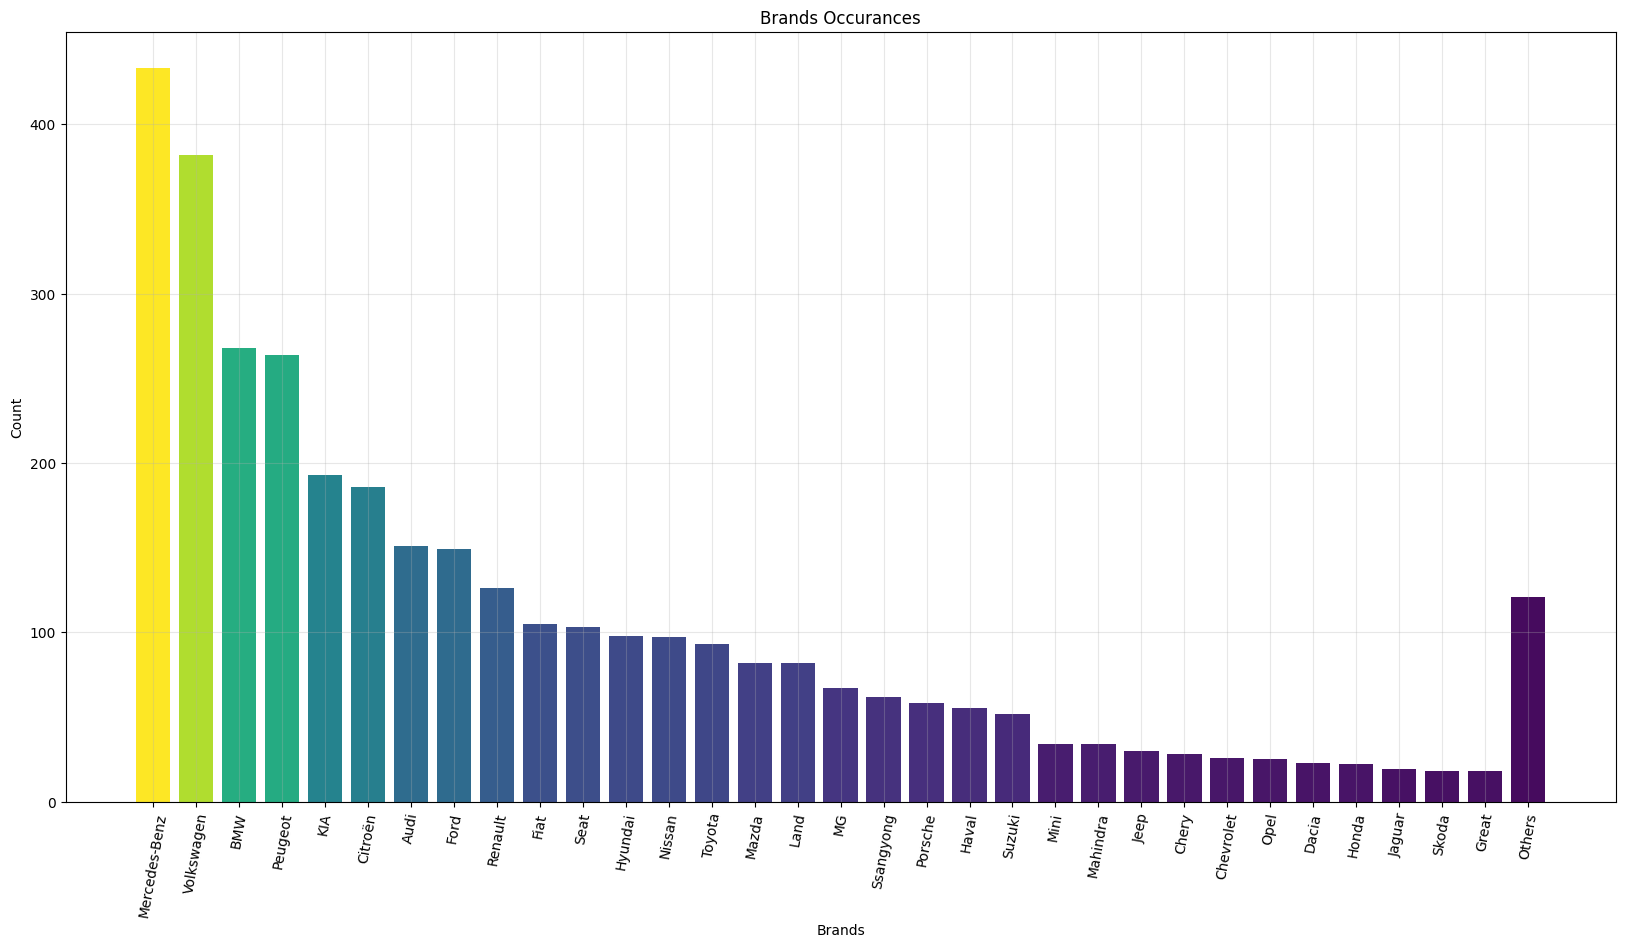

In [56]:
Brands_count = df['Brand'].value_counts()
Brand = df['Brand']

print(Brands_count)
threshold = 0.005 

filtered_Brand_counts = Brands_count[Brands_count / Brands_count.sum() >= threshold]
filtered_Brand_counts['Others'] = Brands_count[Brands_count / Brands_count.sum() < threshold].sum()

colors = cm.viridis(Brands_count.values / max(Brands_count.values))
plt.figure(figsize=(20,10))
plt.bar(filtered_Brand_counts.index, filtered_Brand_counts.values , color=colors)
plt.xlabel('Brands')
plt.ylabel('Count')
plt.title('Brands Occurances')
plt.grid(True,alpha=0.3)
plt.xticks(rotation=80)
plt.show()



Body_type
Berline       902
SUV/4x4       698
Citadine      688
Autres        426
Compacte      372
Coupé         187
Utilitaire    112
Pick up        54
Monospace      45
Cabriolet      20
Name: count, dtype: int64


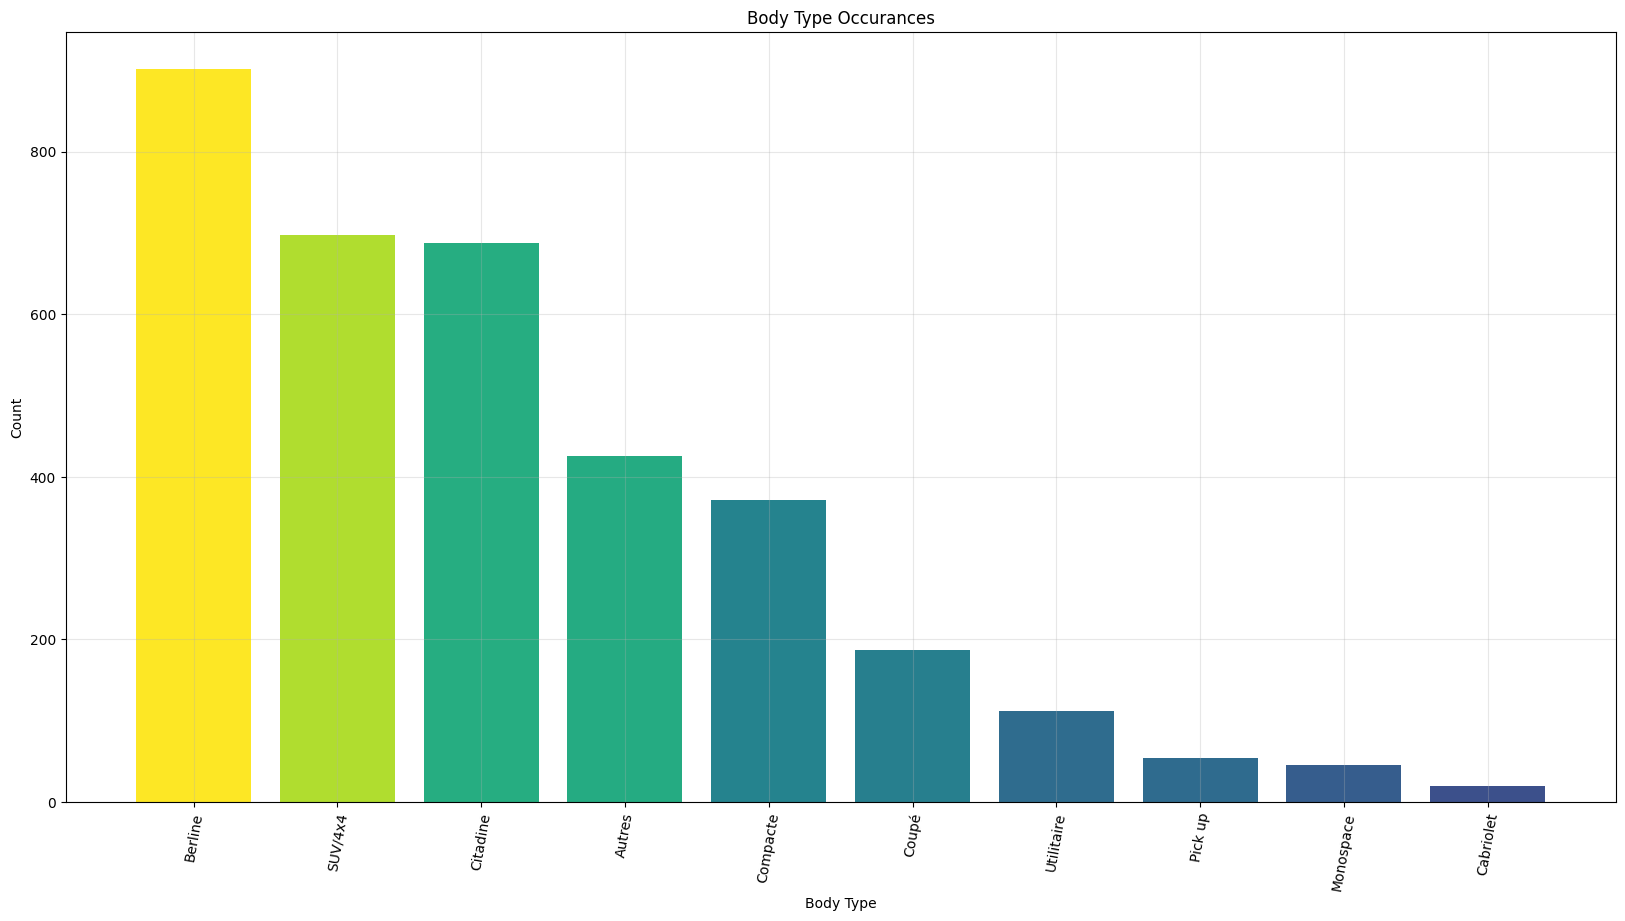

In [55]:
Body_type_count = df['Body_type'].value_counts()
print(Body_type_count)
threshold = 0.009 

colors = cm.viridis(Brands_count.values / max(Brands_count.values))
plt.figure(figsize=(20,10))
plt.bar(Body_type_count.index, Body_type_count.values , color=colors)
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.title('Body Type Occurances')
plt.grid(True,alpha=0.3)
plt.xticks(rotation=80)
plt.show()
 


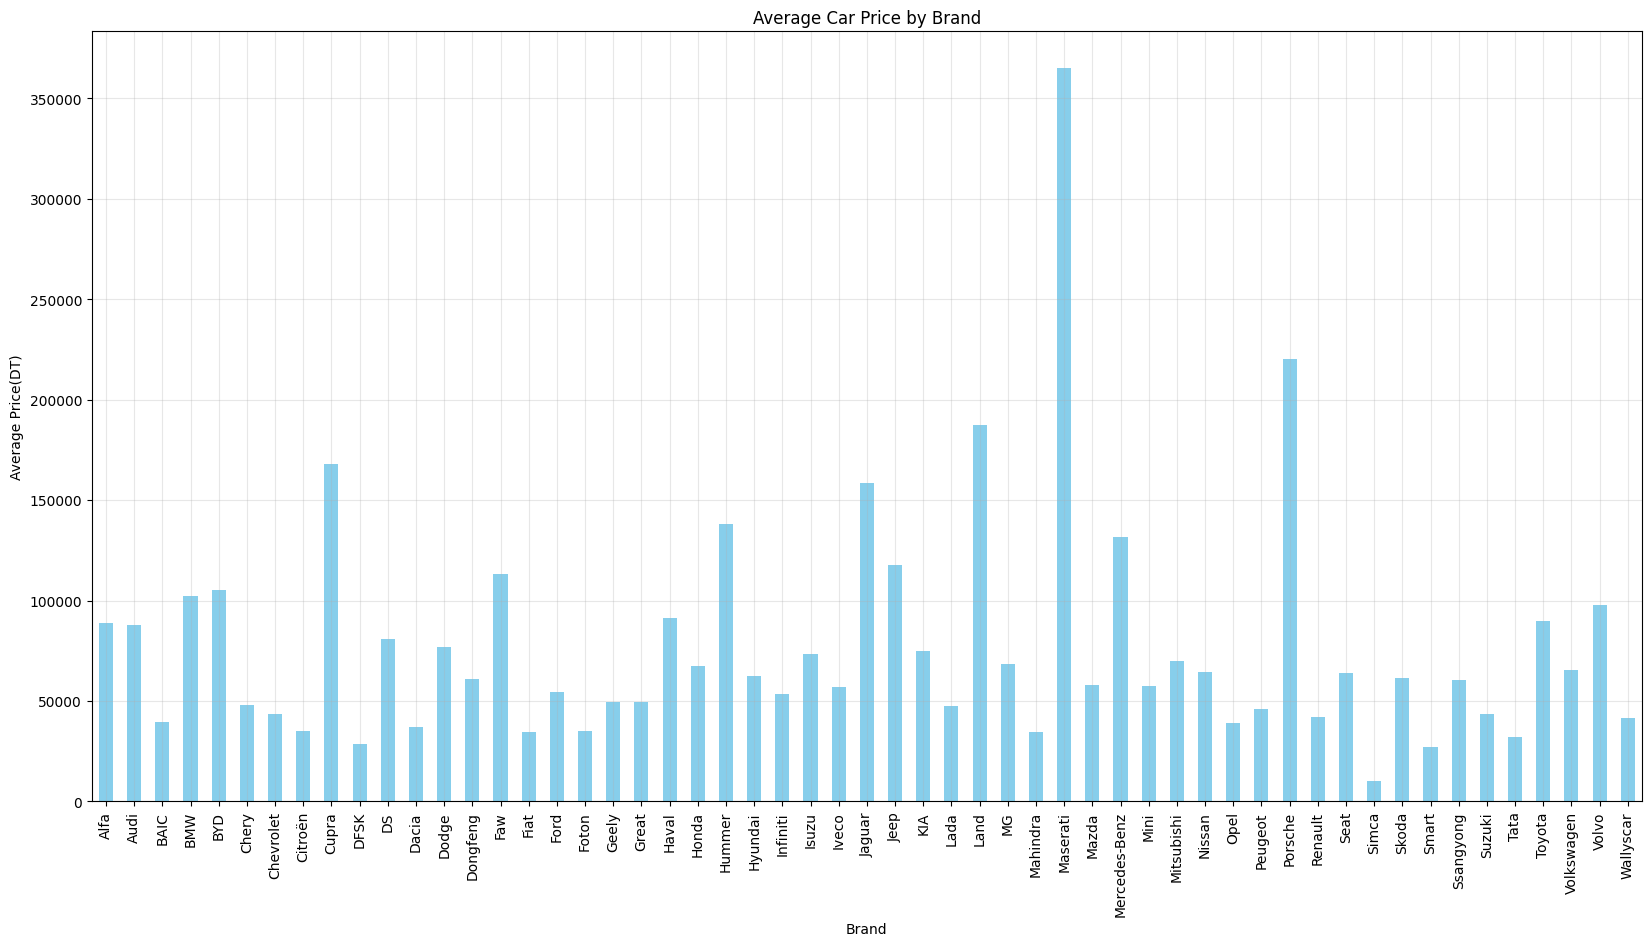

In [54]:
brand_avg_price = df.groupby("Brand")["Price(DT)"].mean()
plt.figure(figsize=(20,10))
brand_avg_price.plot(kind='bar',color='skyblue')
plt.title("Average Car Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price(DT)")
plt.grid(True,alpha=0.3)
plt.show()